In [1]:
import csv
import itertools
import pandas as pd
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import display, Image

# read csv into dict
# cols are name, pubchemid, inchikey, inchikey (chem trans service), diff, inchi, isomeric smiles, smiles
# require the inchikey to be > 2 to filter any NA's
with open('final-chems.tsv', 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    next(reader) # skip header
    name_map = {store[0]:store[1:] for store in reader if len(store[2]) > 2}

Now that we have our chemicals, let's grid all of them out.

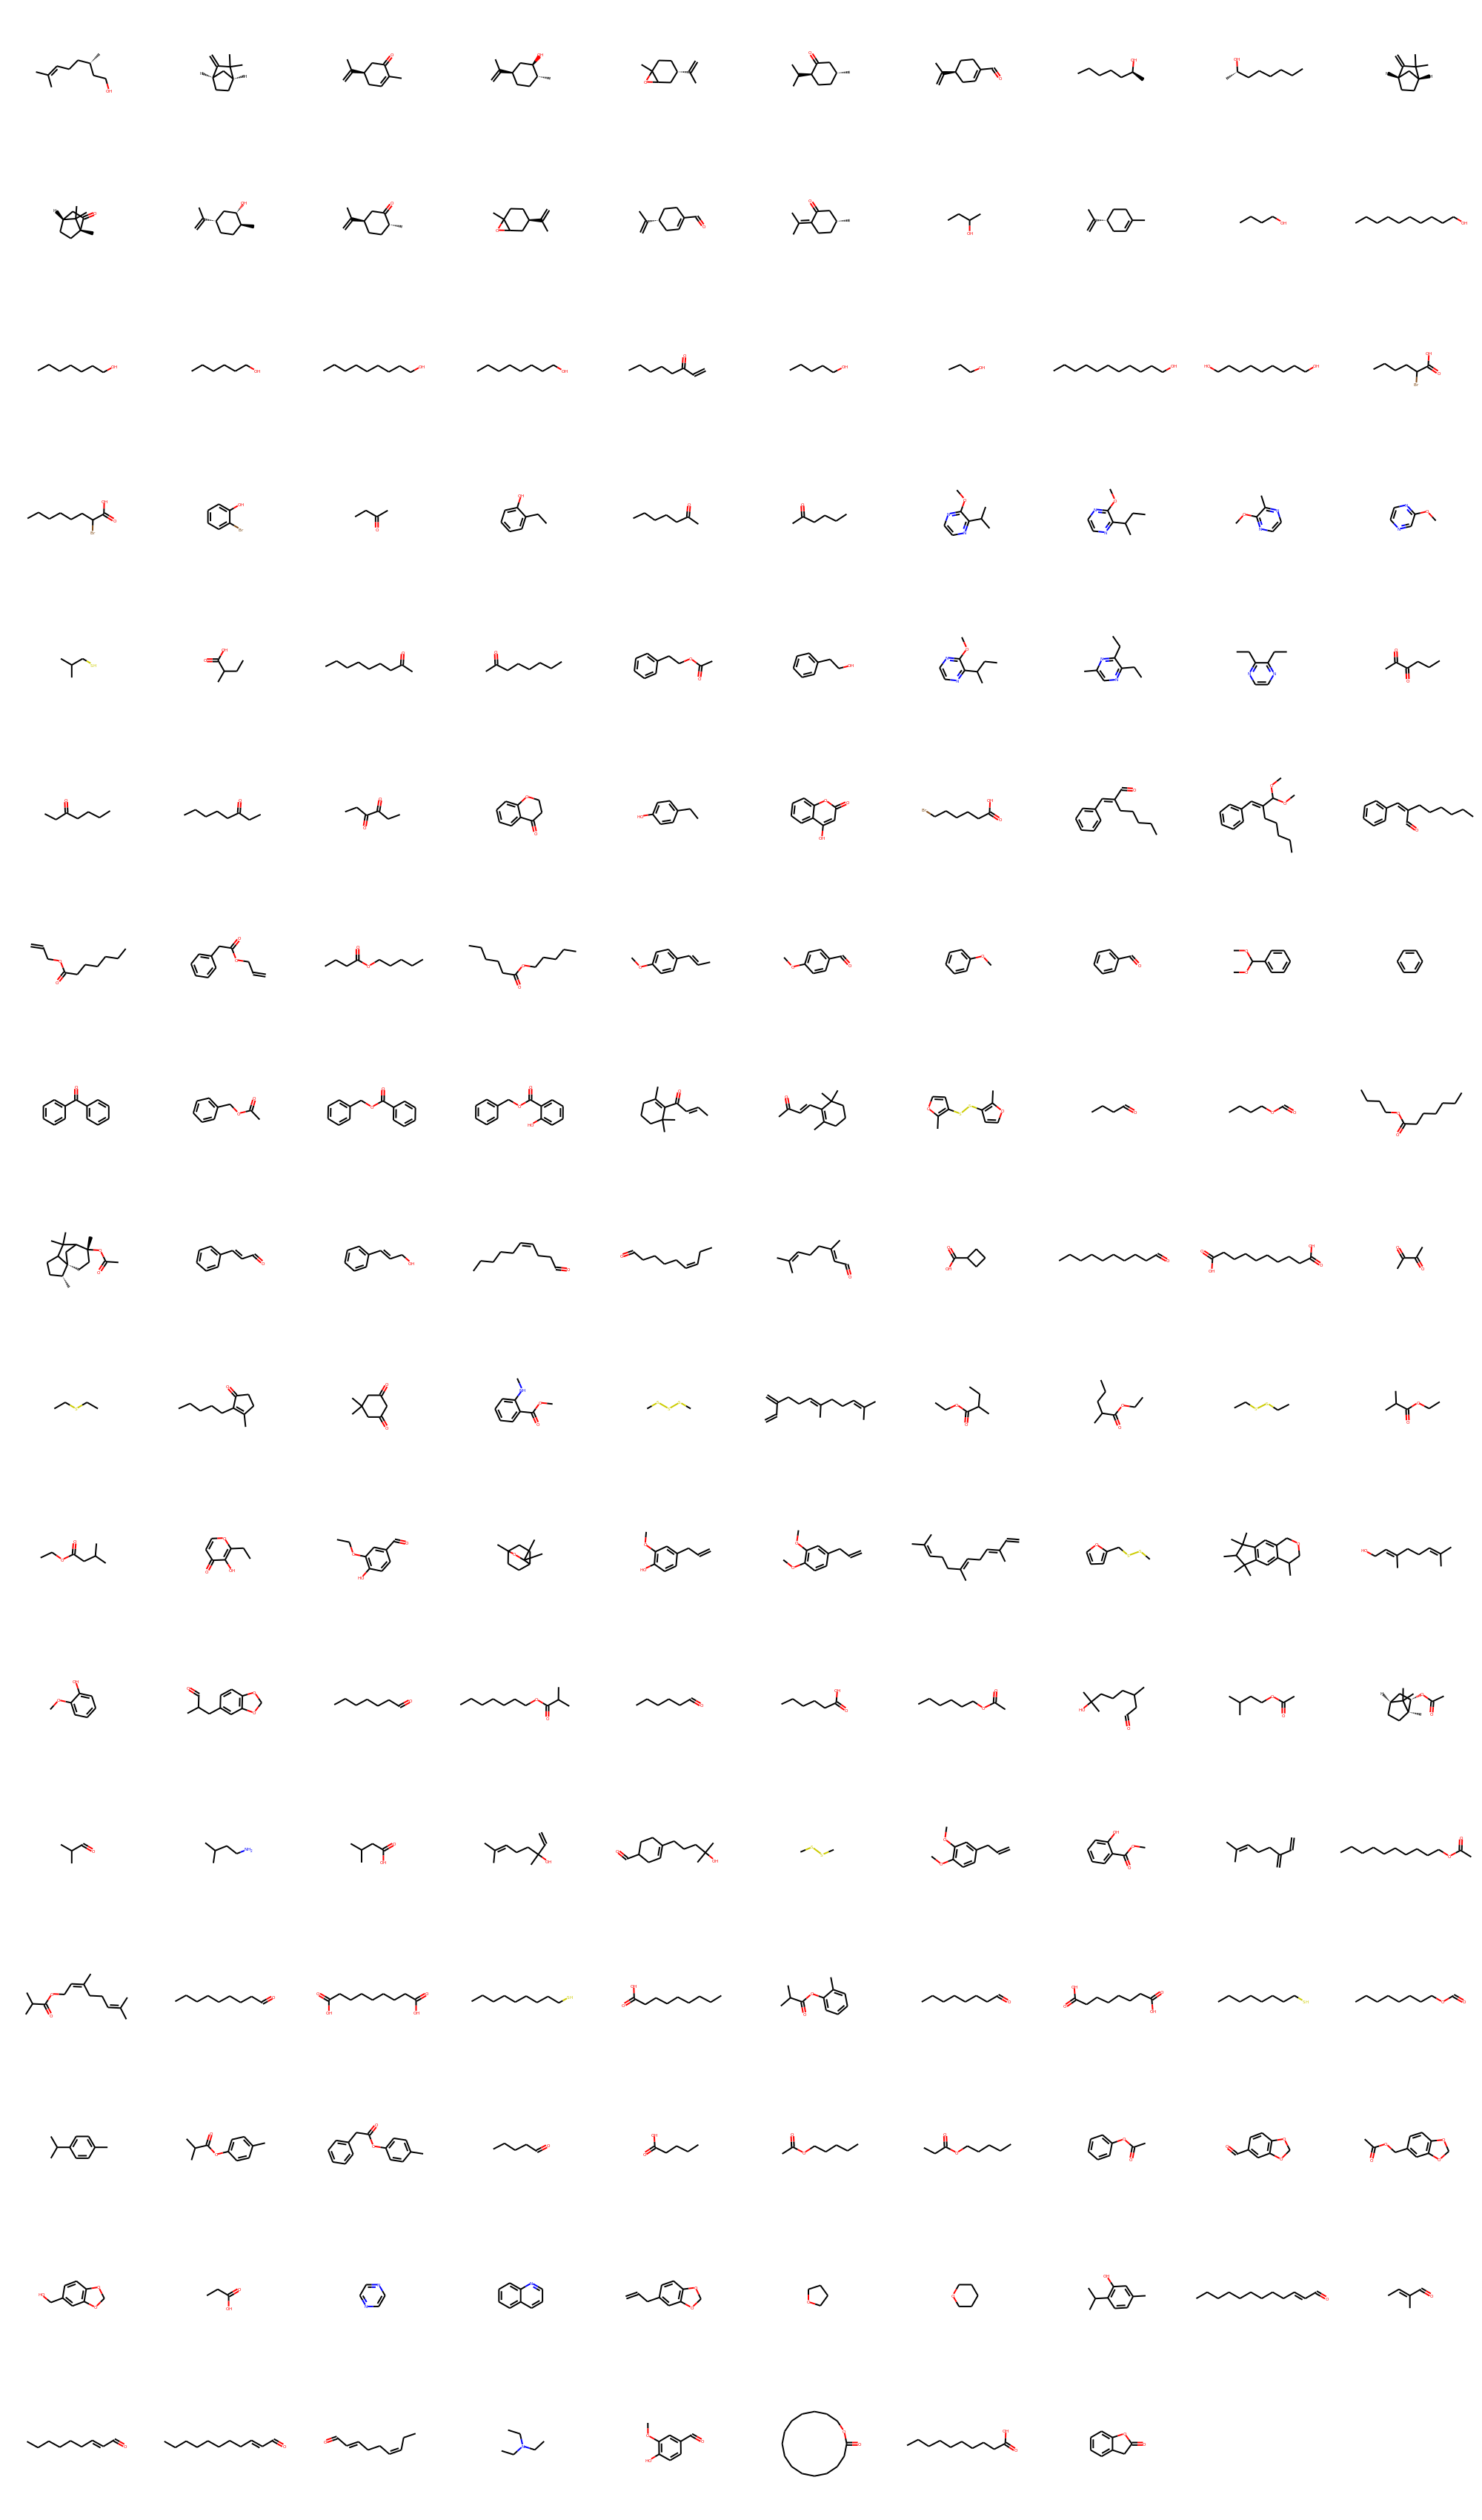

In [2]:
chem_names, chem_images = zip(*[(key, Chem.inchi.MolFromInchi(value[4])) for key, value in name_map.items()])
Draw.MolsToGridImage(chem_images, molsPerRow=10,  maxMols=200)

Load the OR's from Rishi and plot out the chemicals for each one

In [3]:
or_chems = defaultdict(list)
with open('./ors-inchi-rishi.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip header
    for line in reader:
        or_chems[line[0]].append((line[1], line[4], line[2]))

102_1


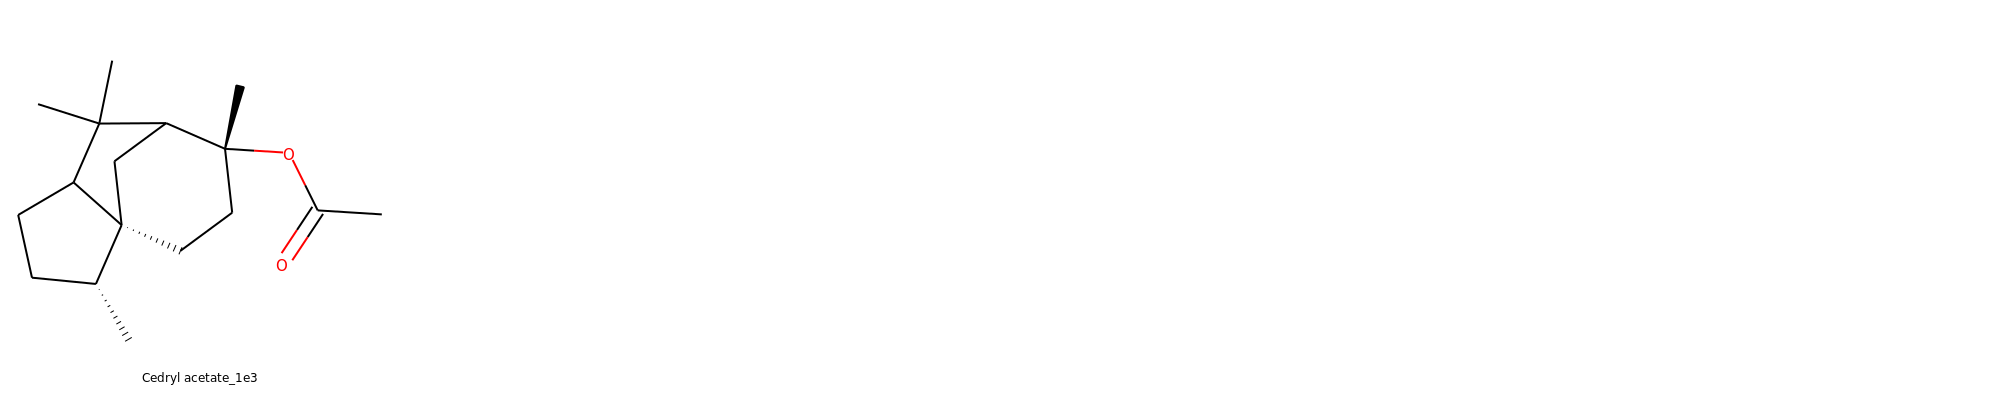

112_1


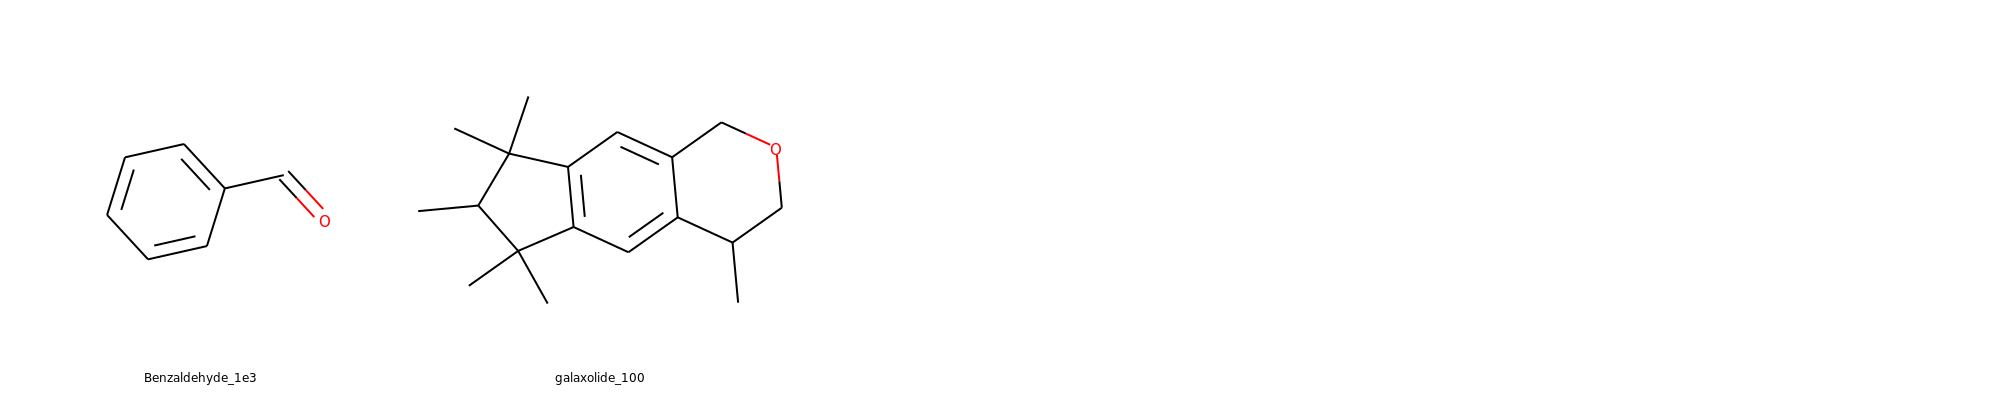

119_1


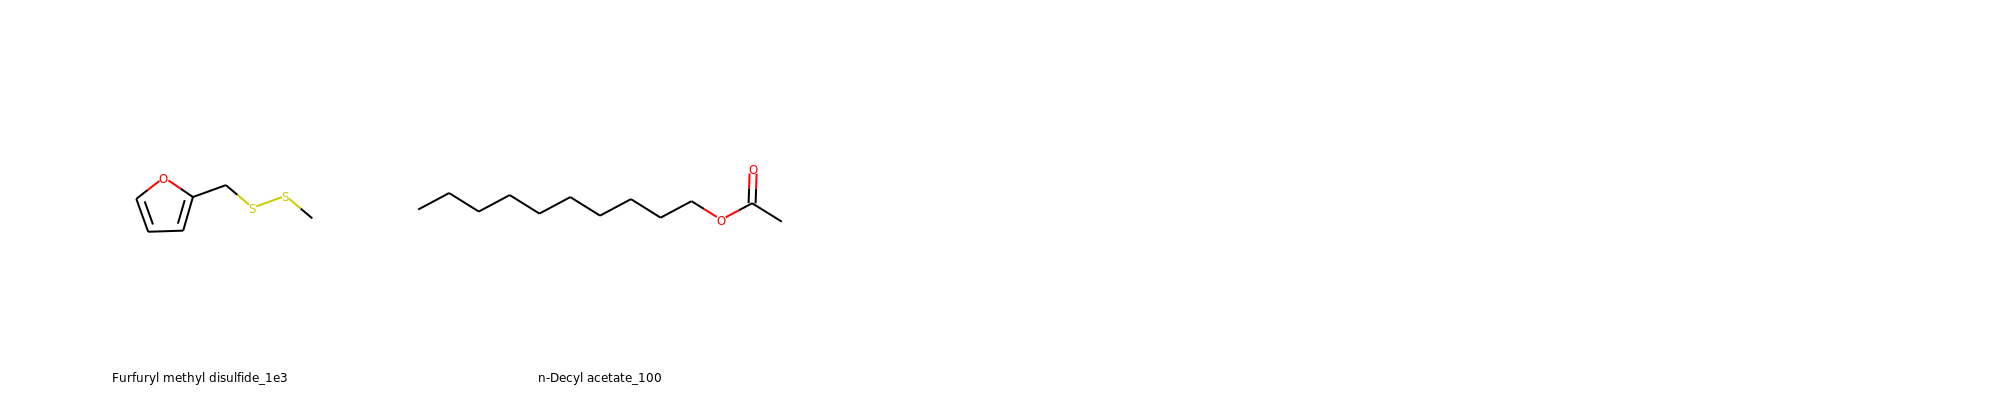

120_1


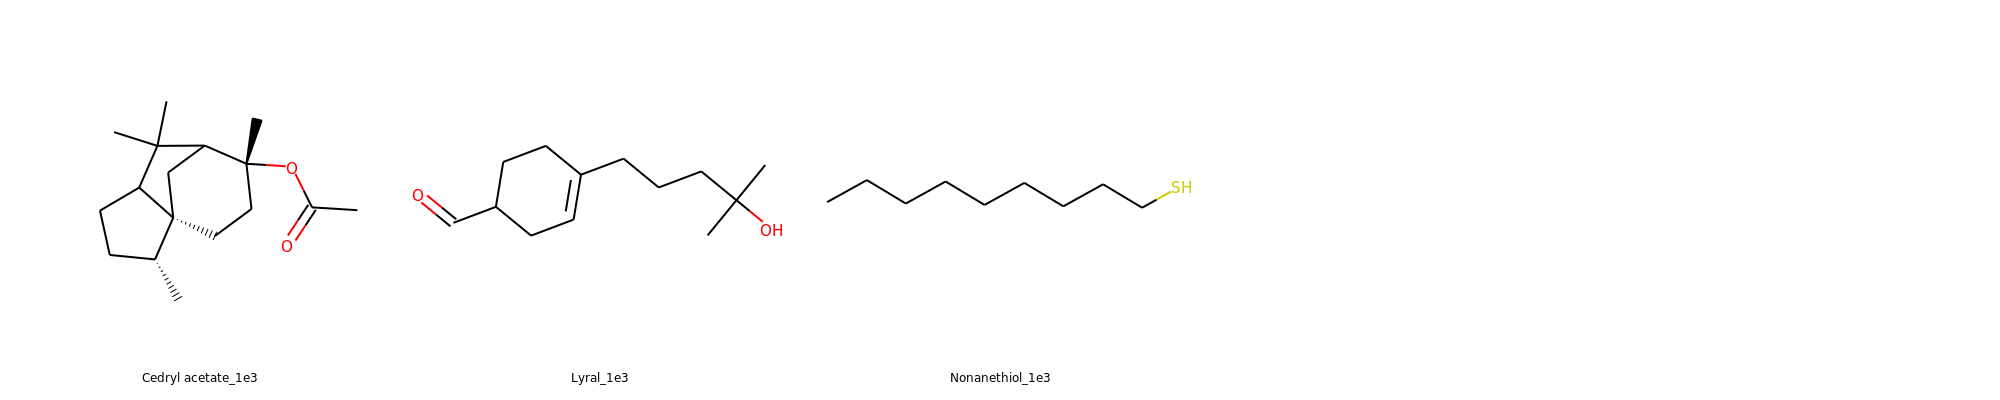

13_1


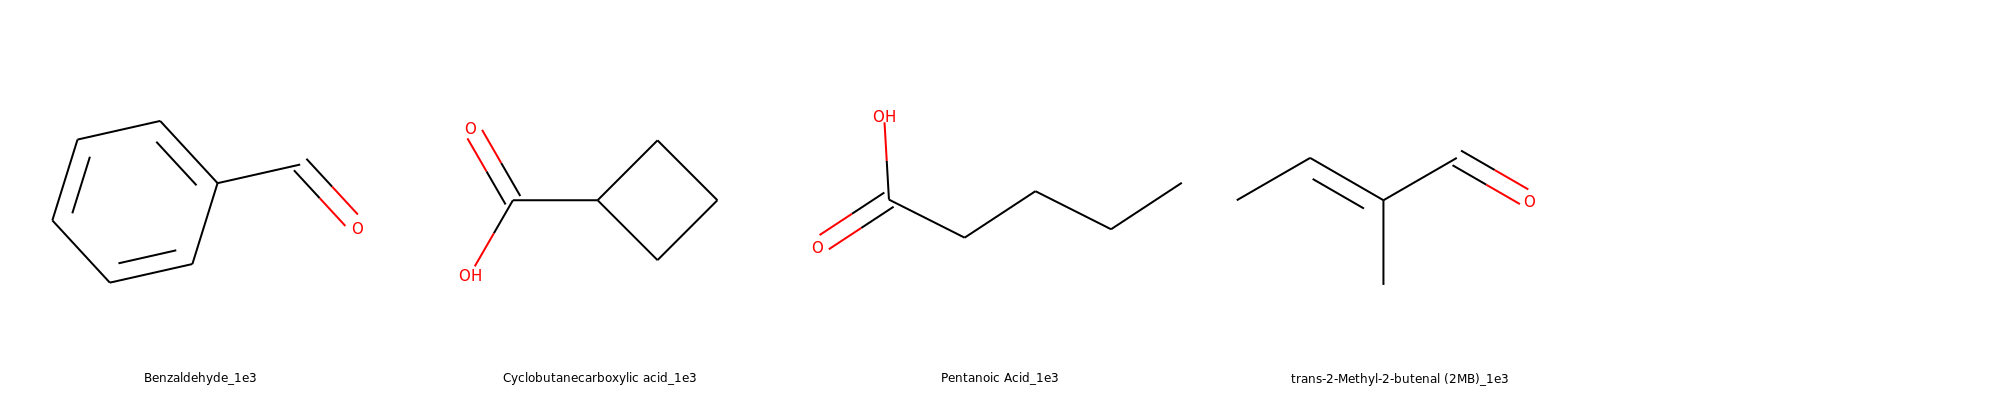

131_1_2


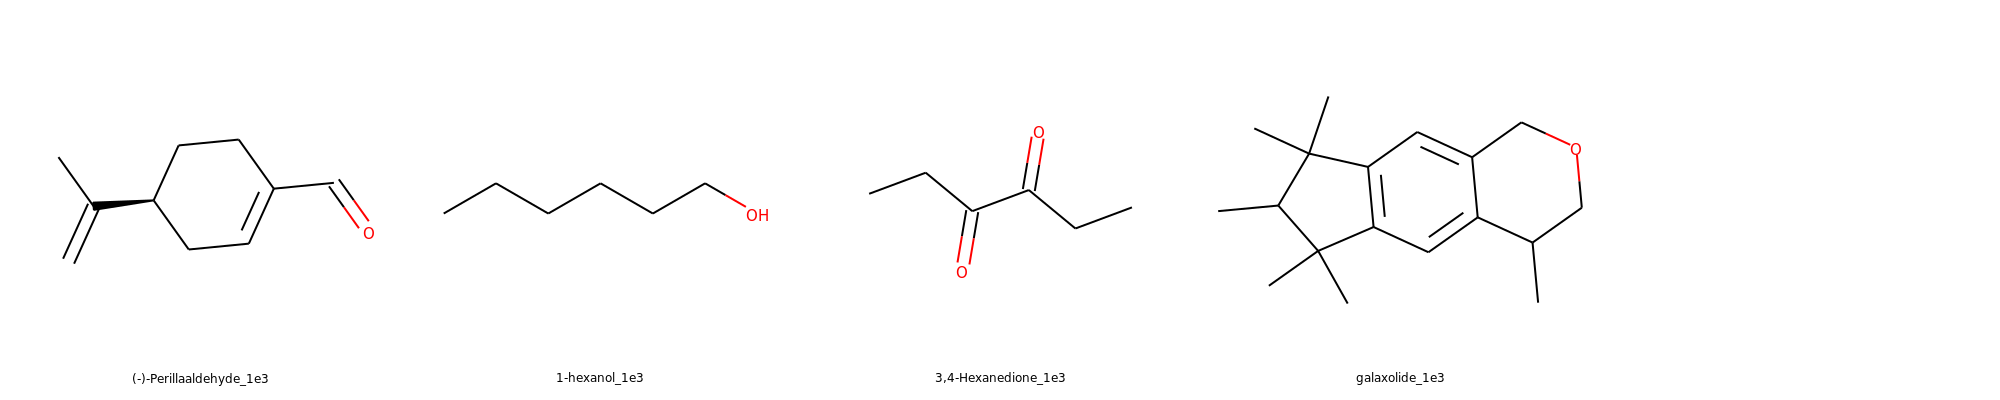

132_1


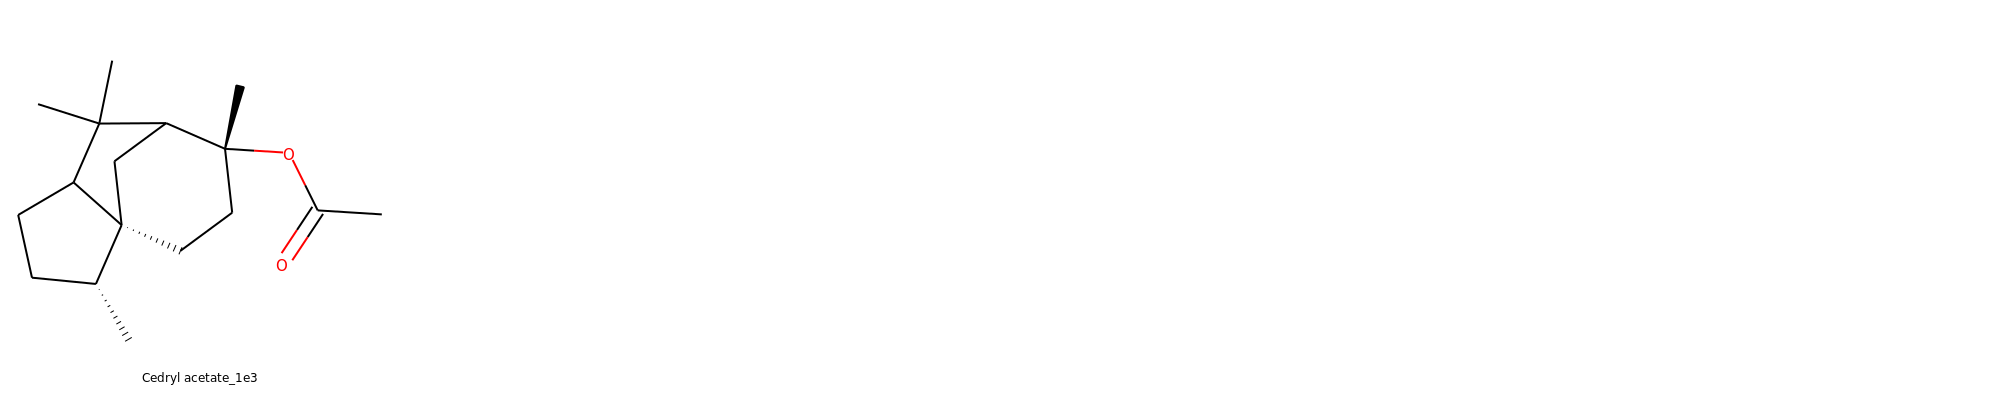

133_1


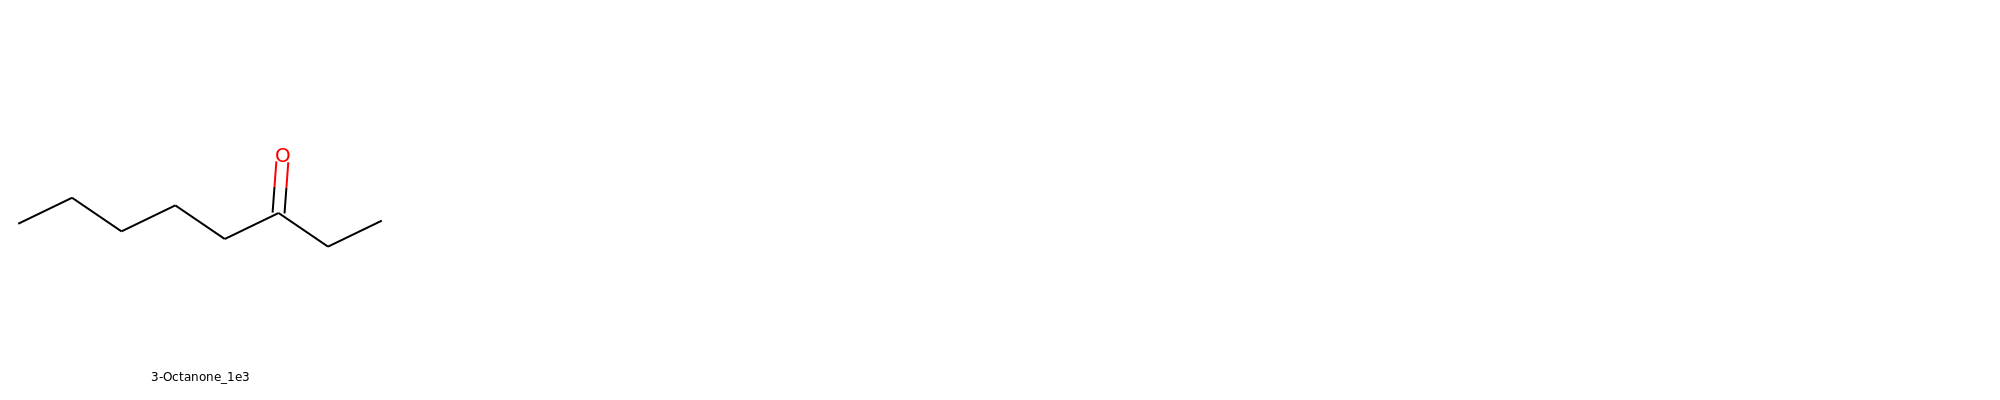

136_1


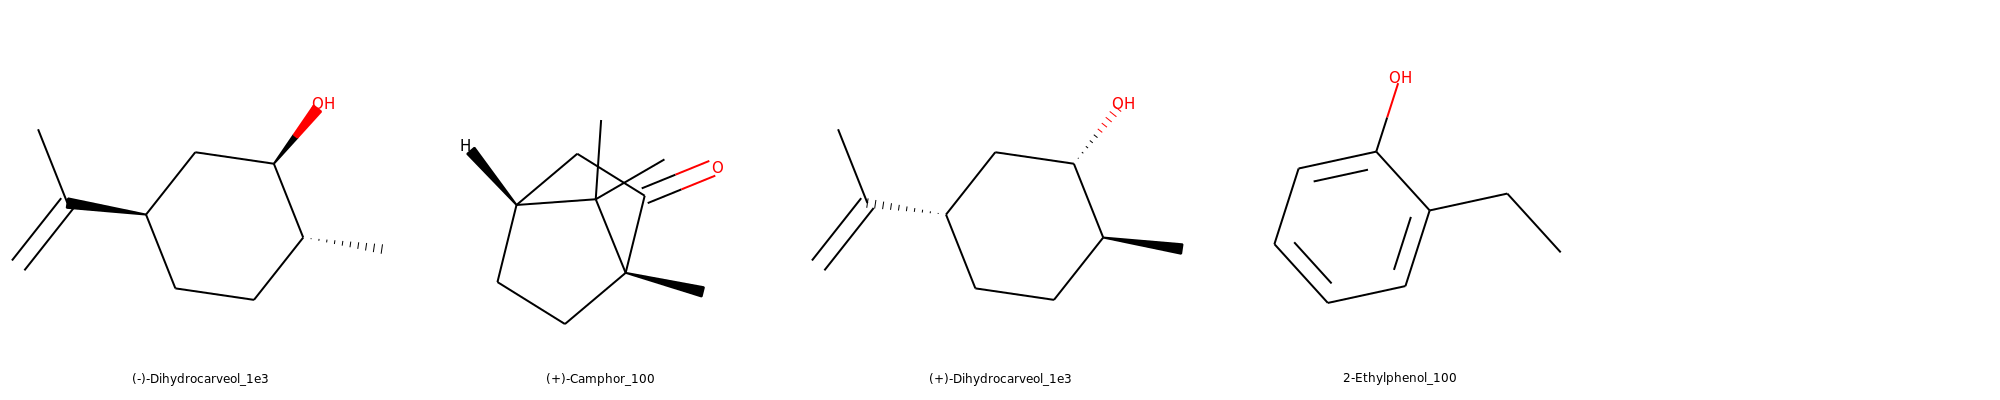

139_1


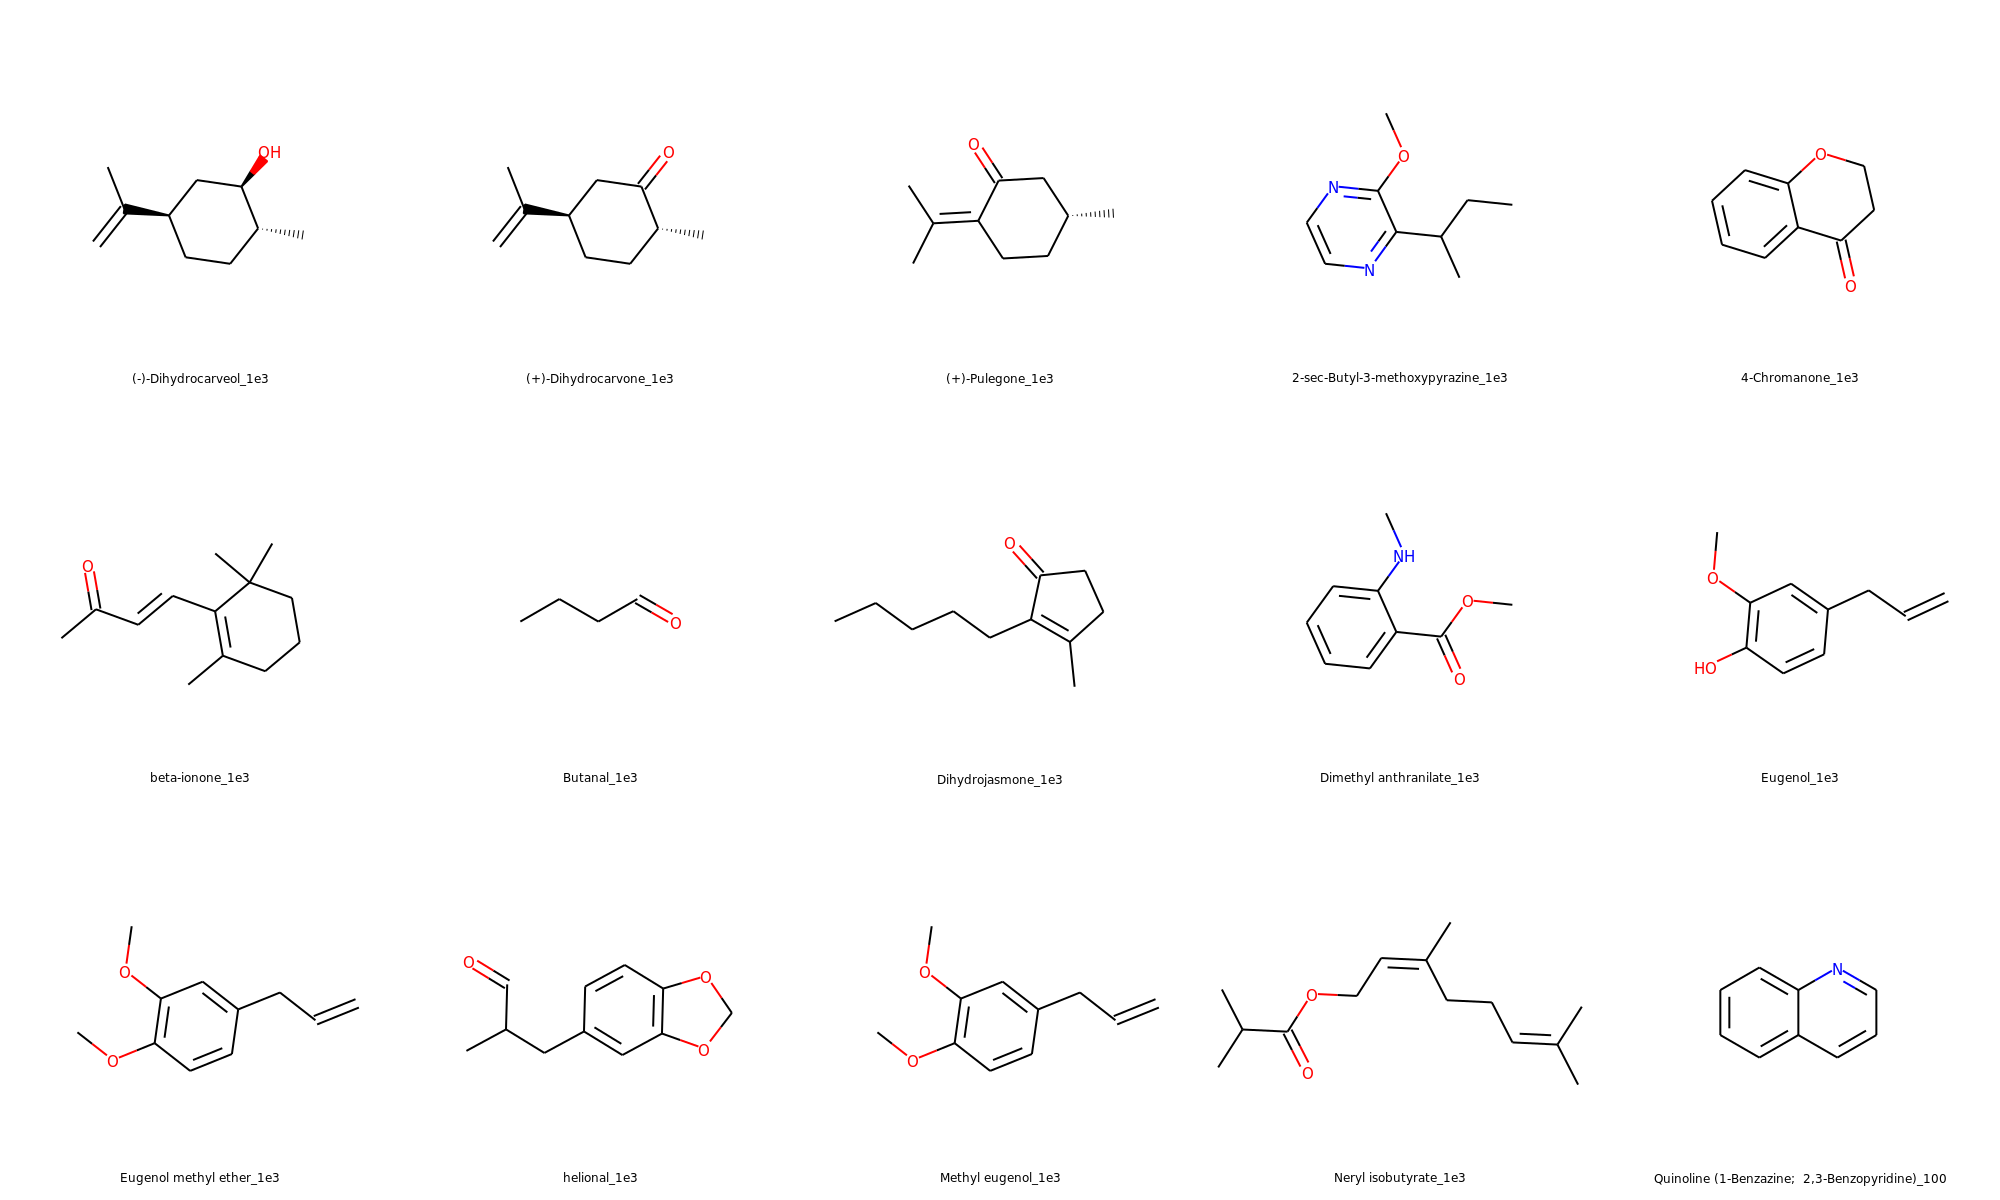

142_1


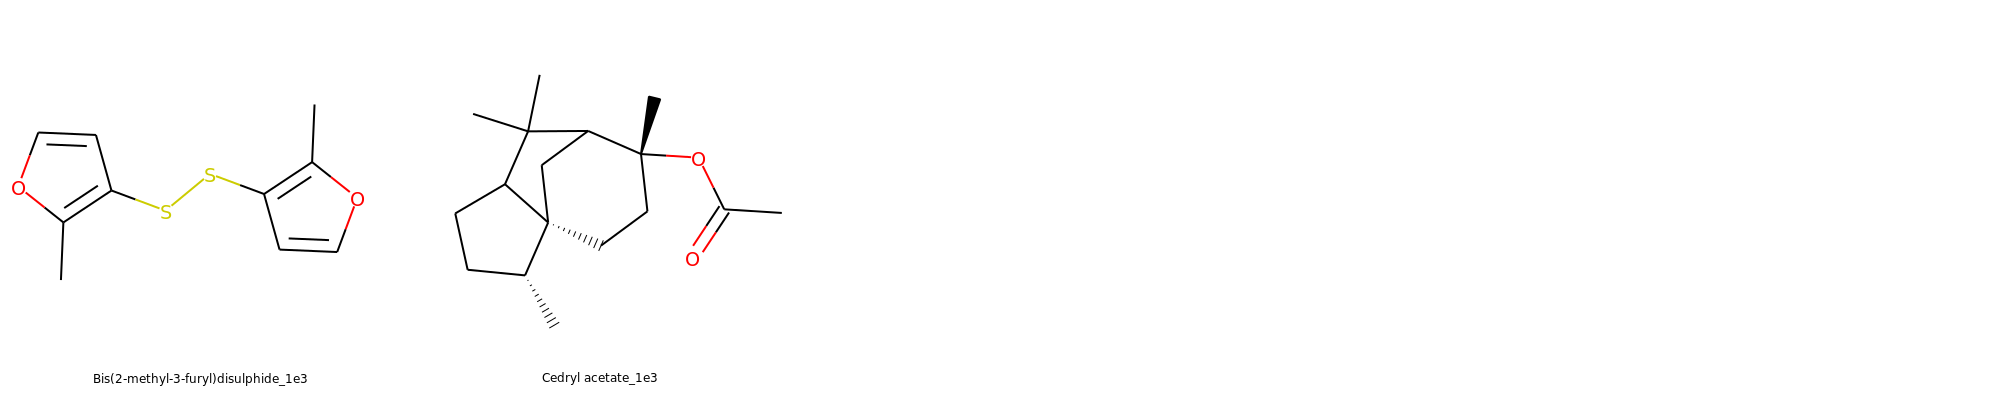

165_1


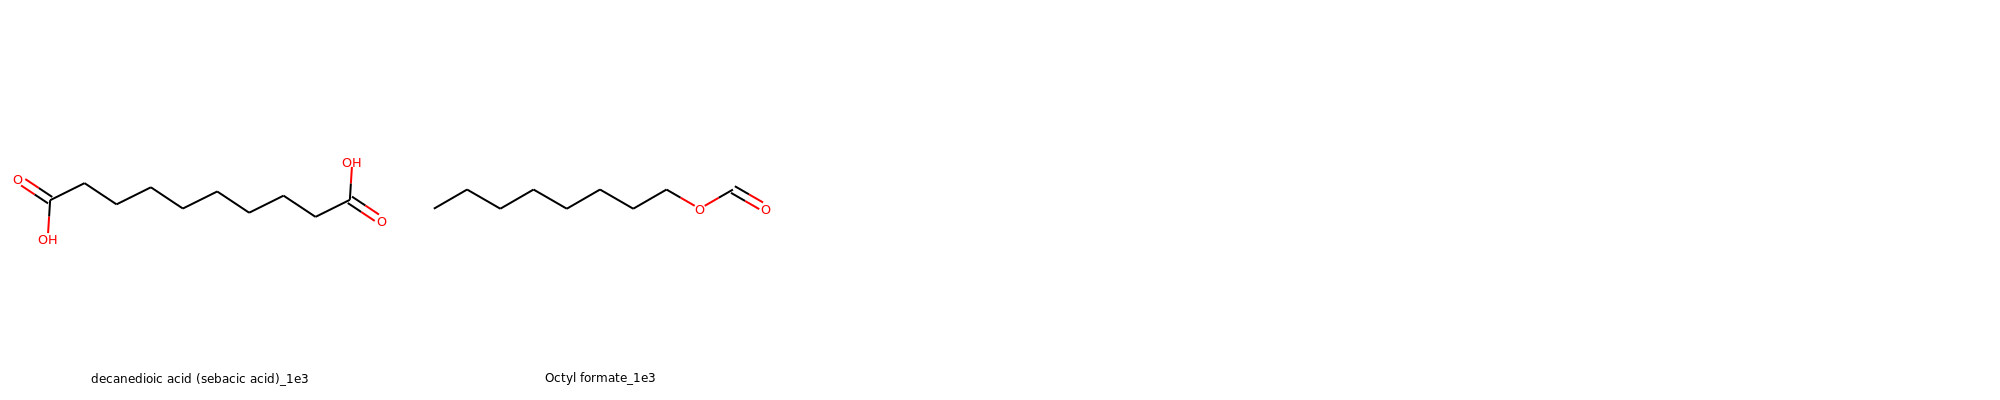

170_1


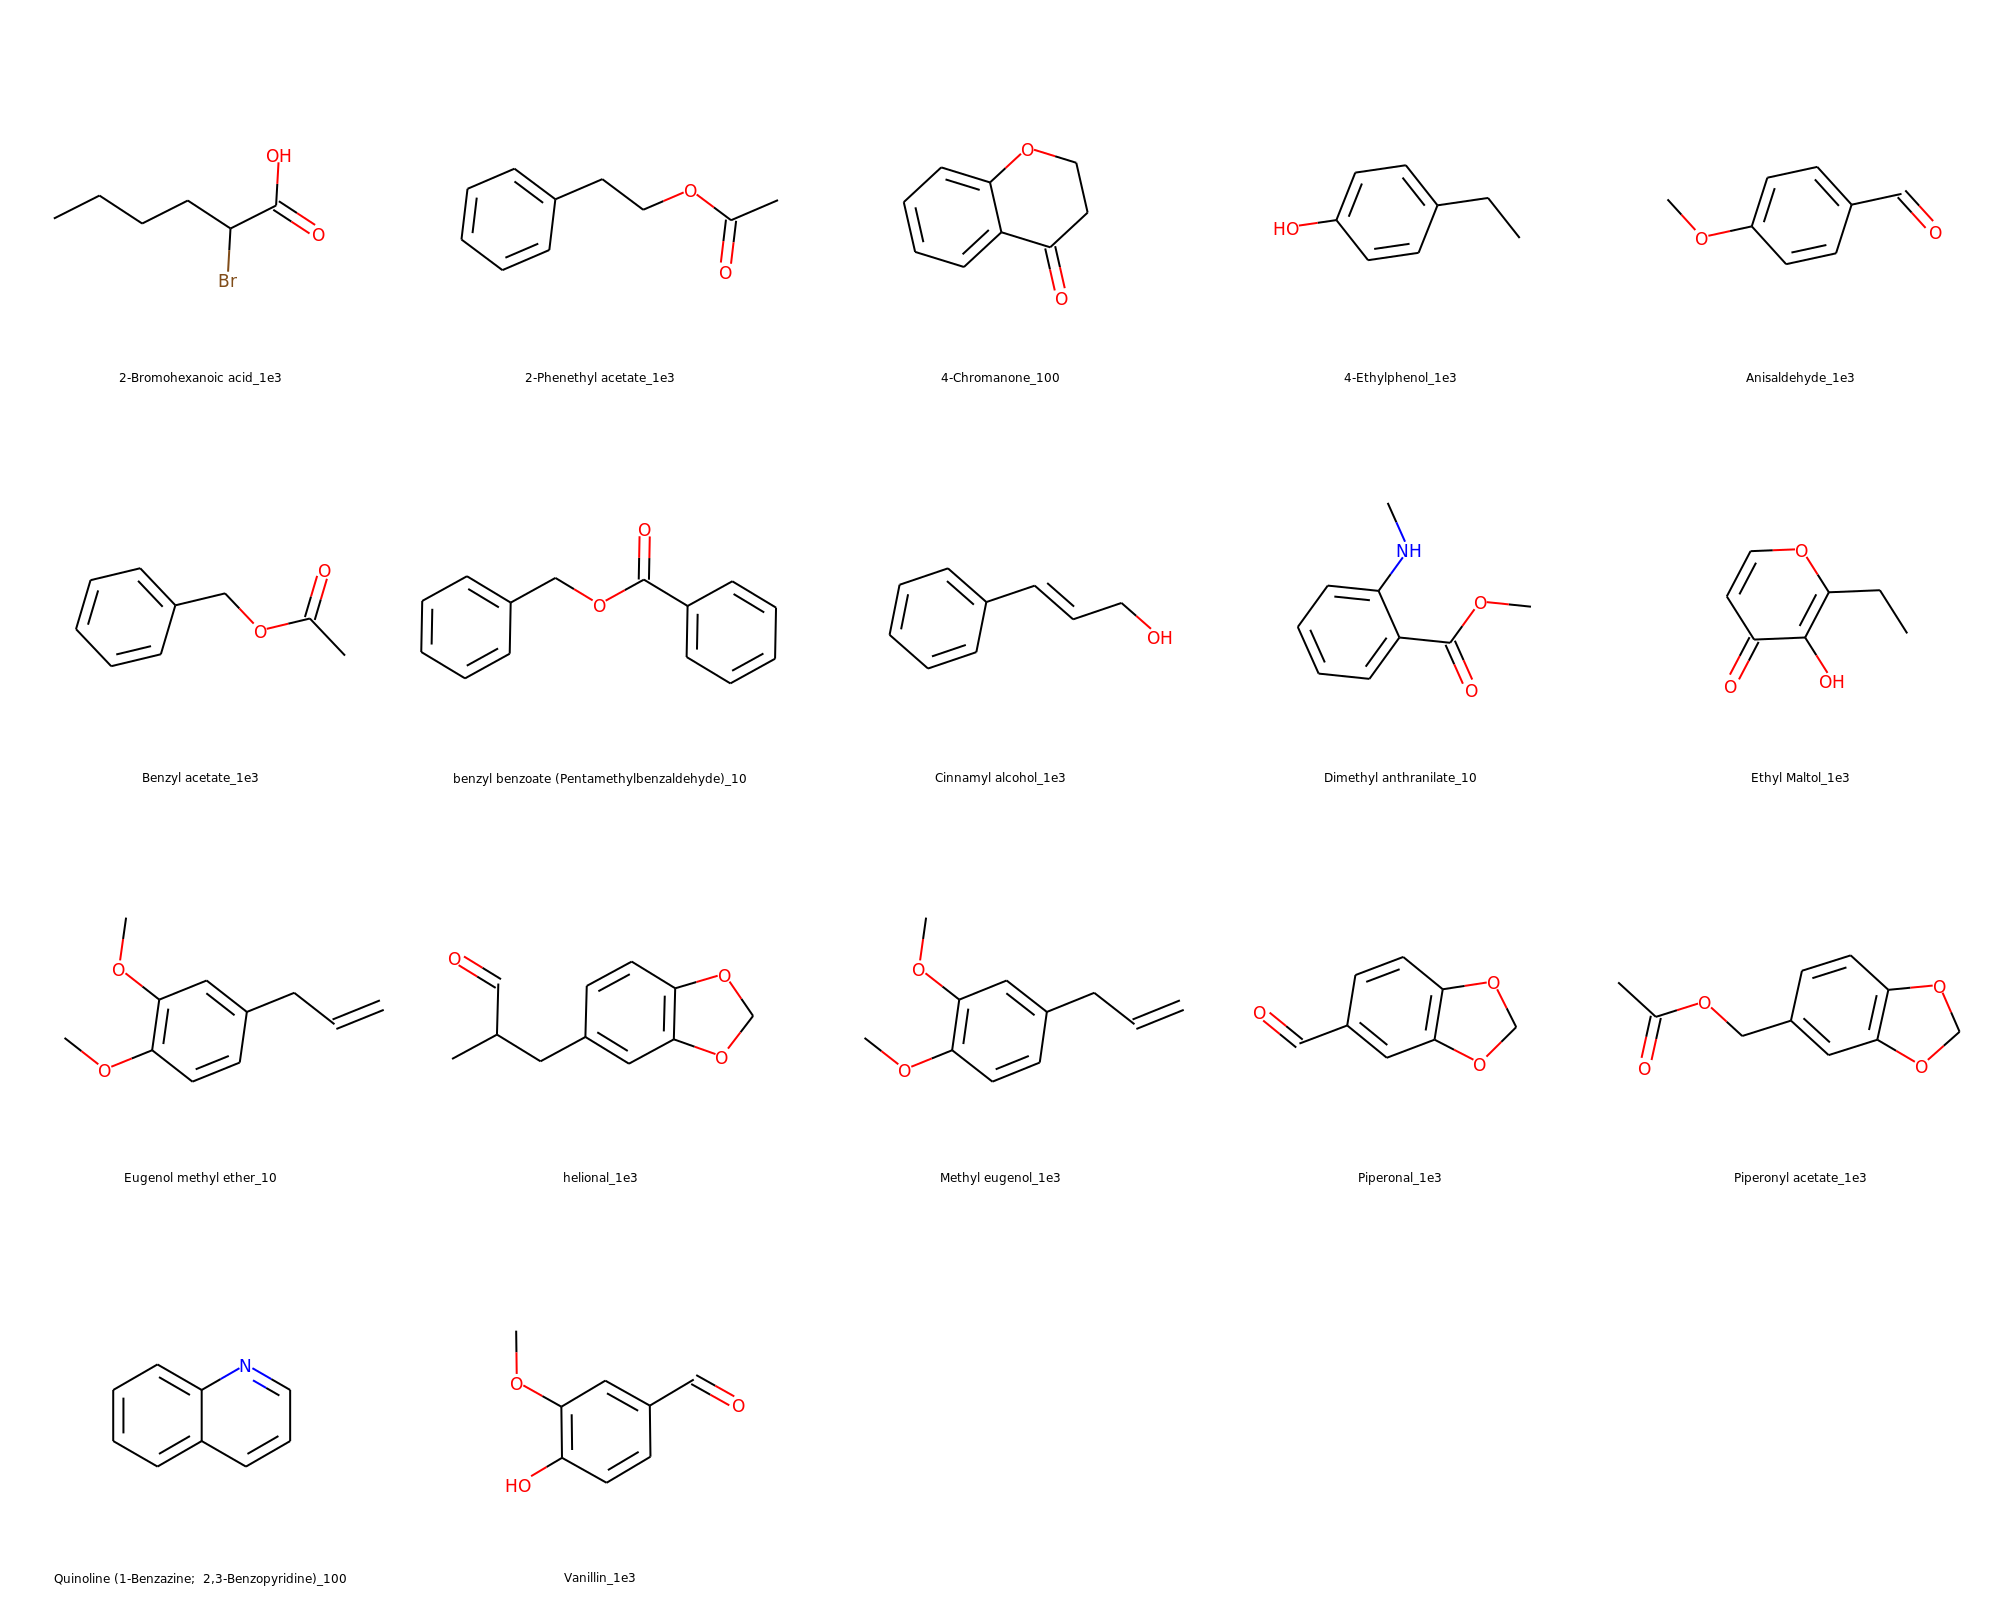

180_1


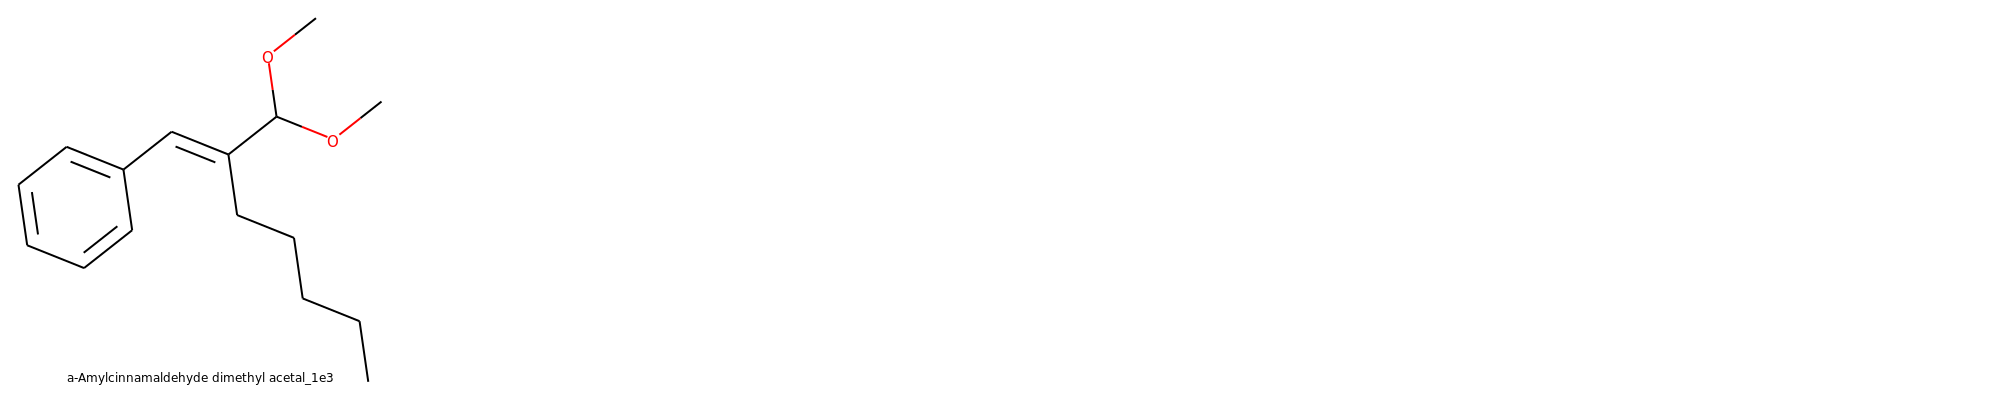

189_1


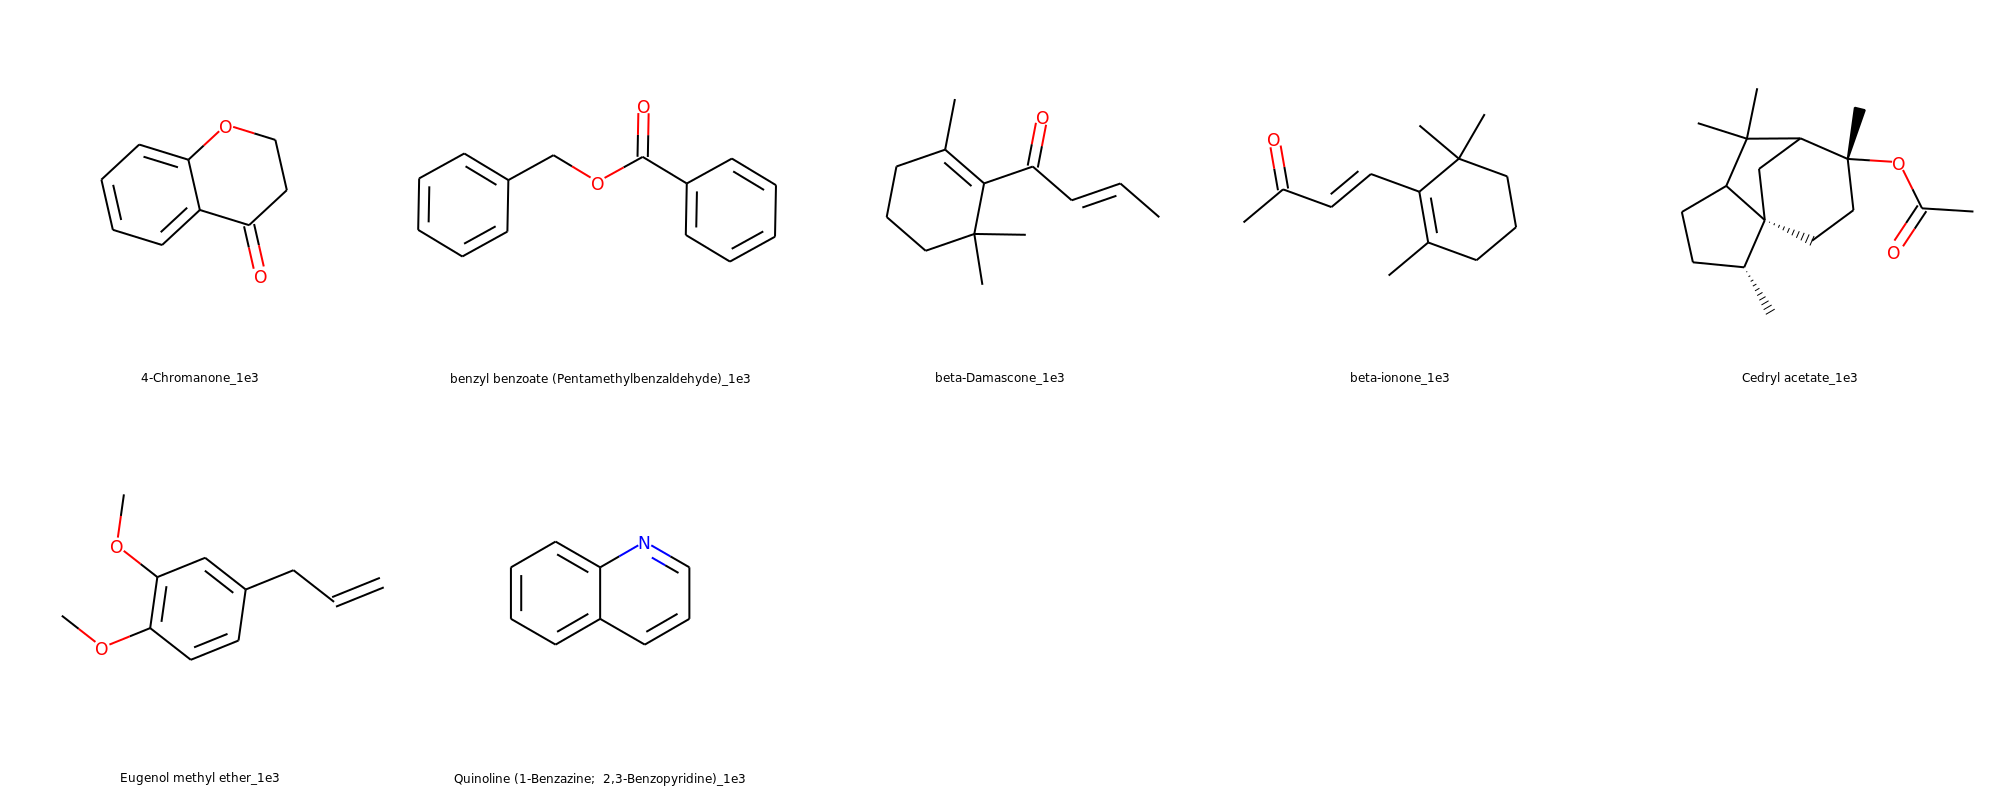

19_1


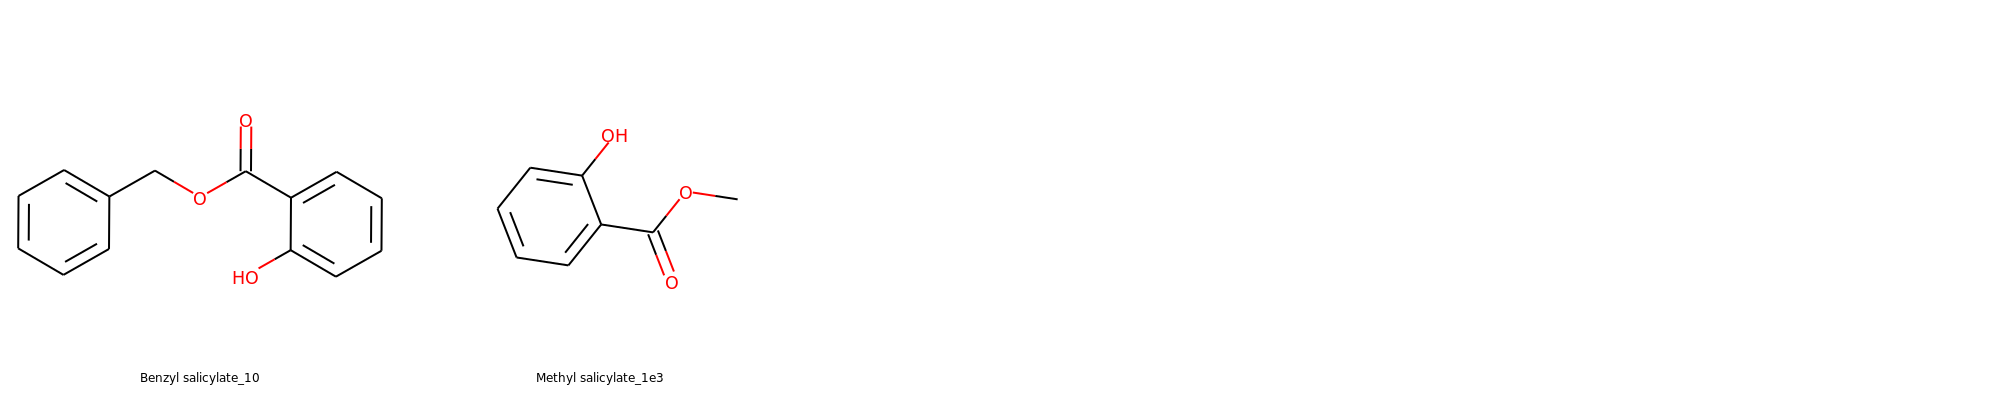

199_1


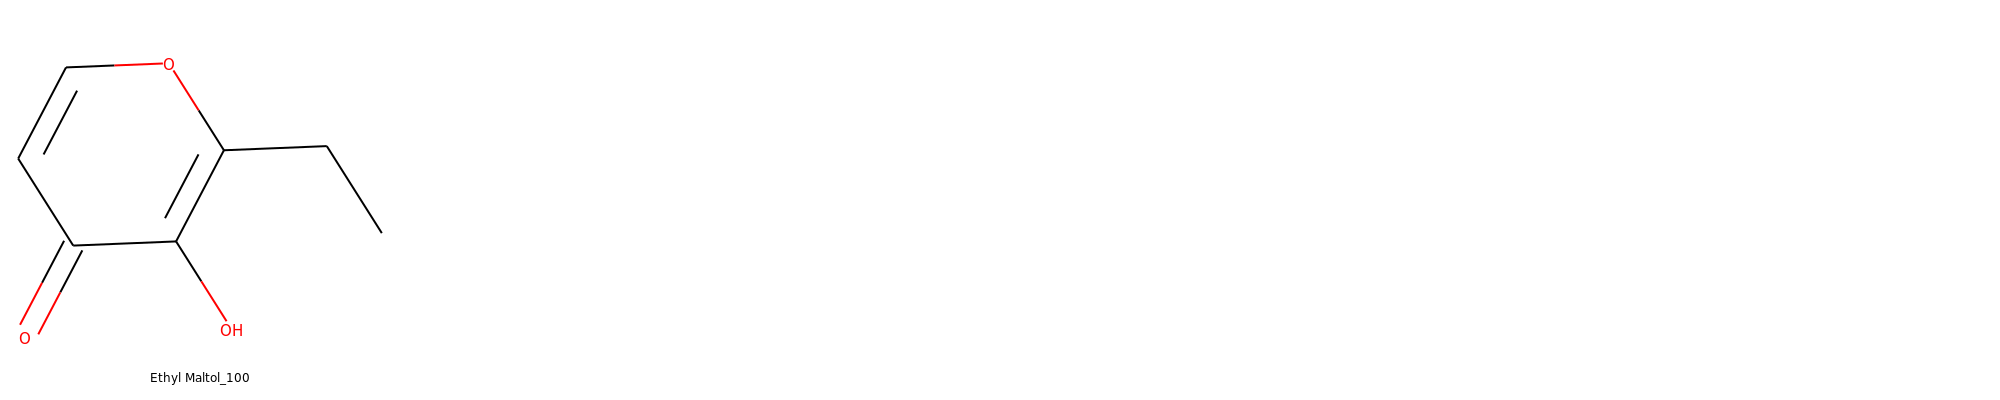

203_1


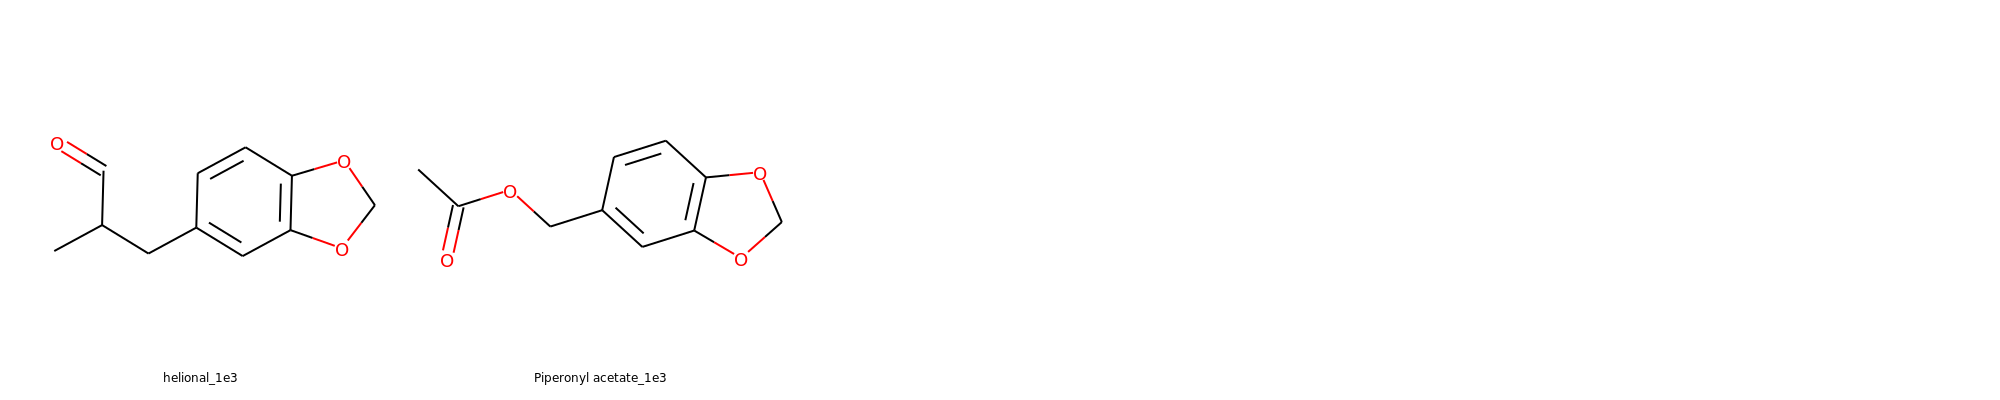

208_1


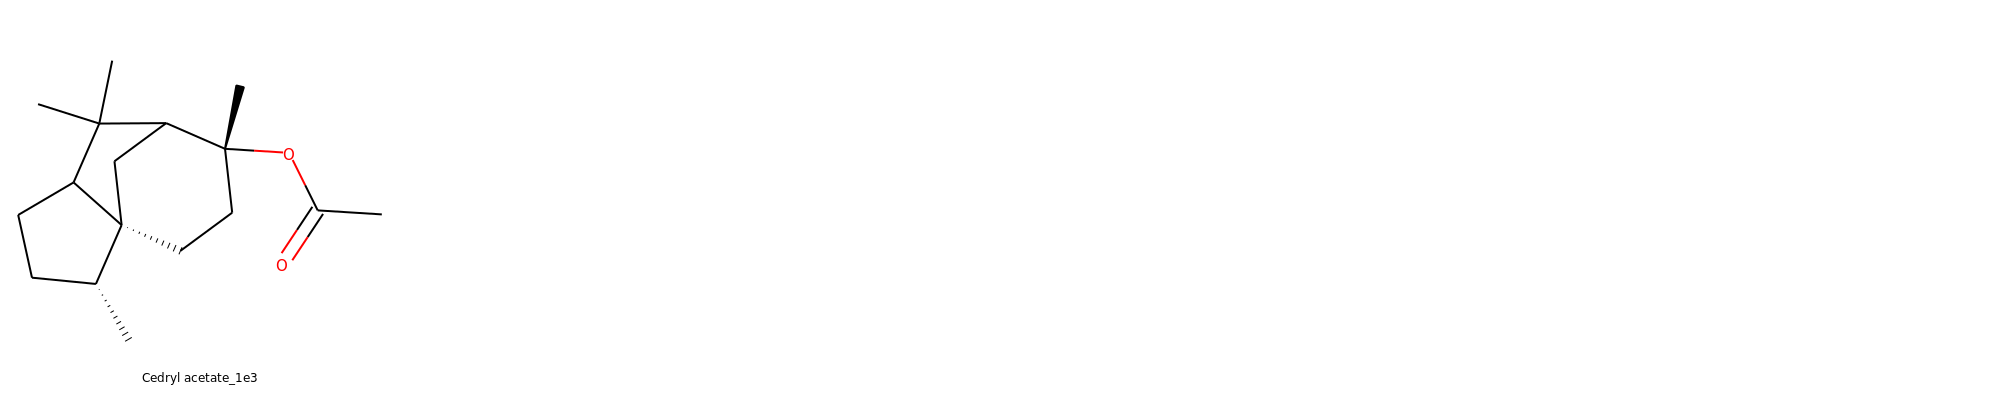

23_1_2


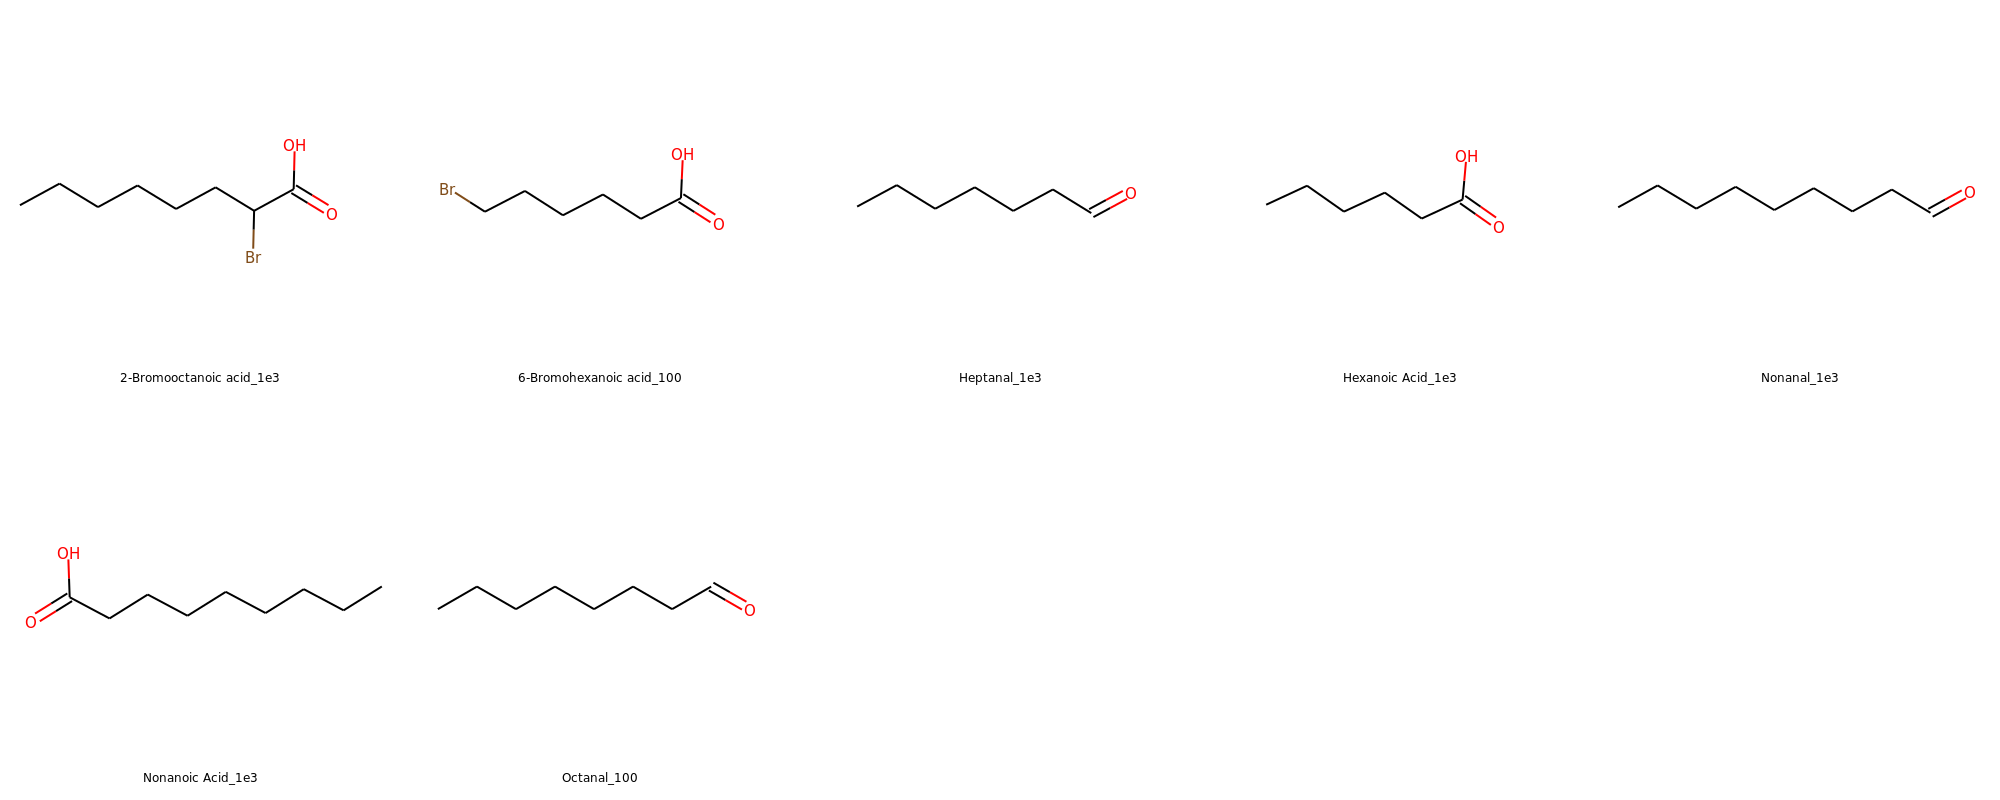

25_1


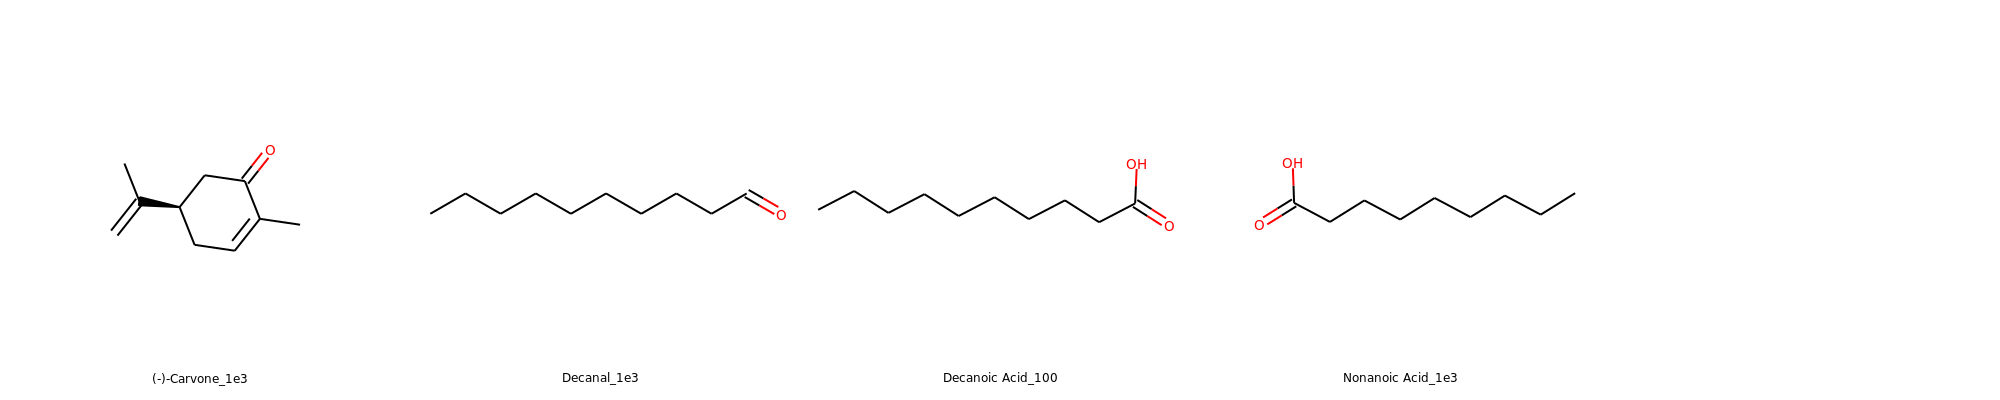

30_1


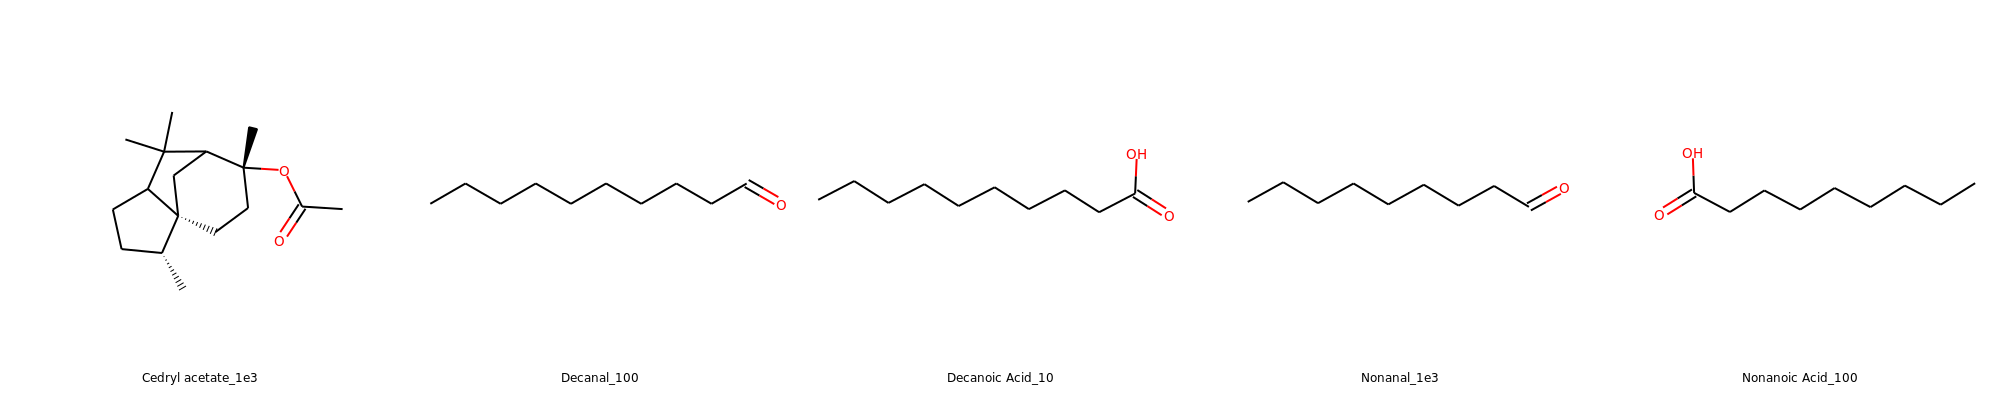

4_1


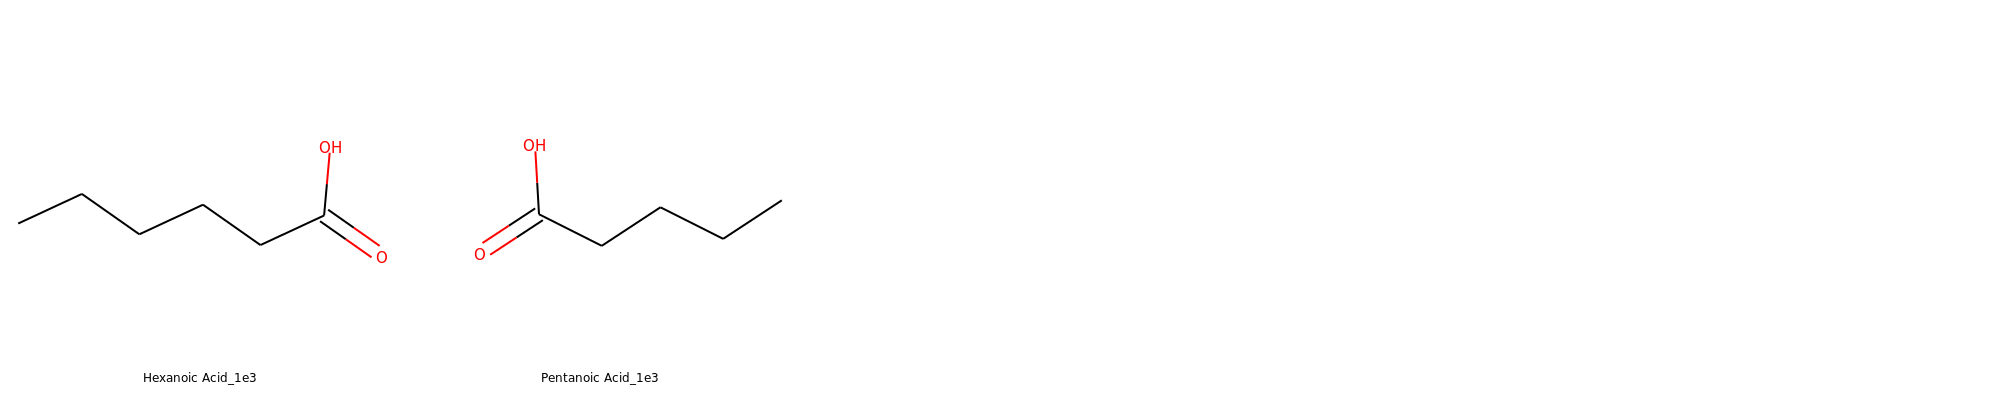

5_1


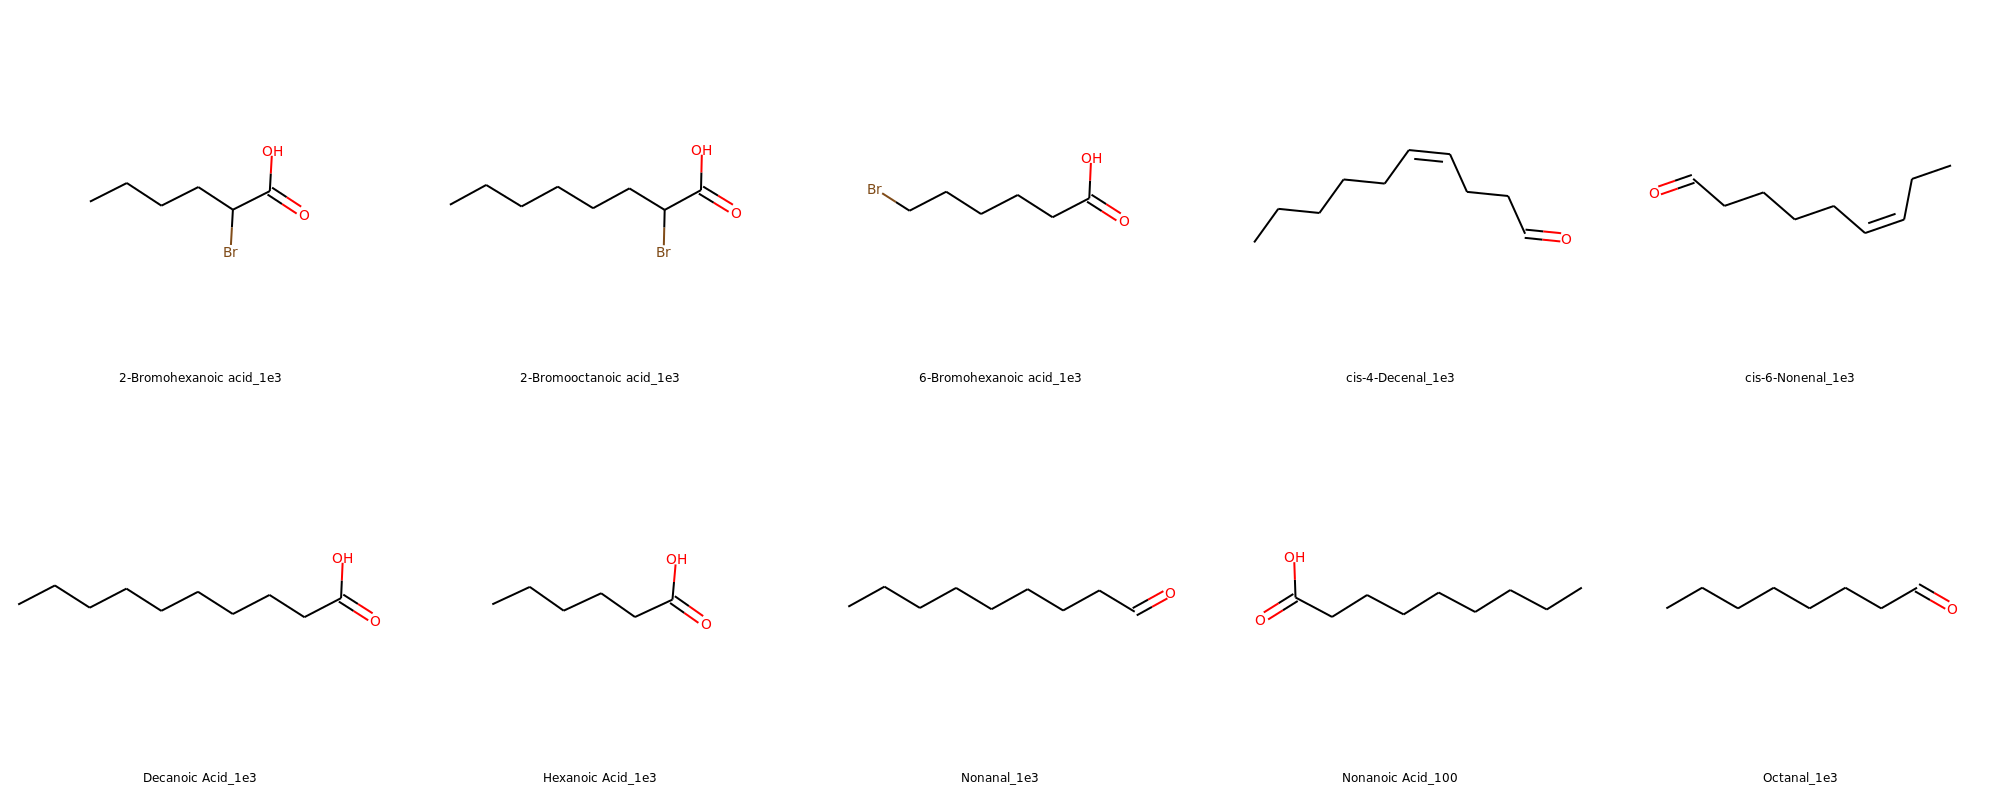

62


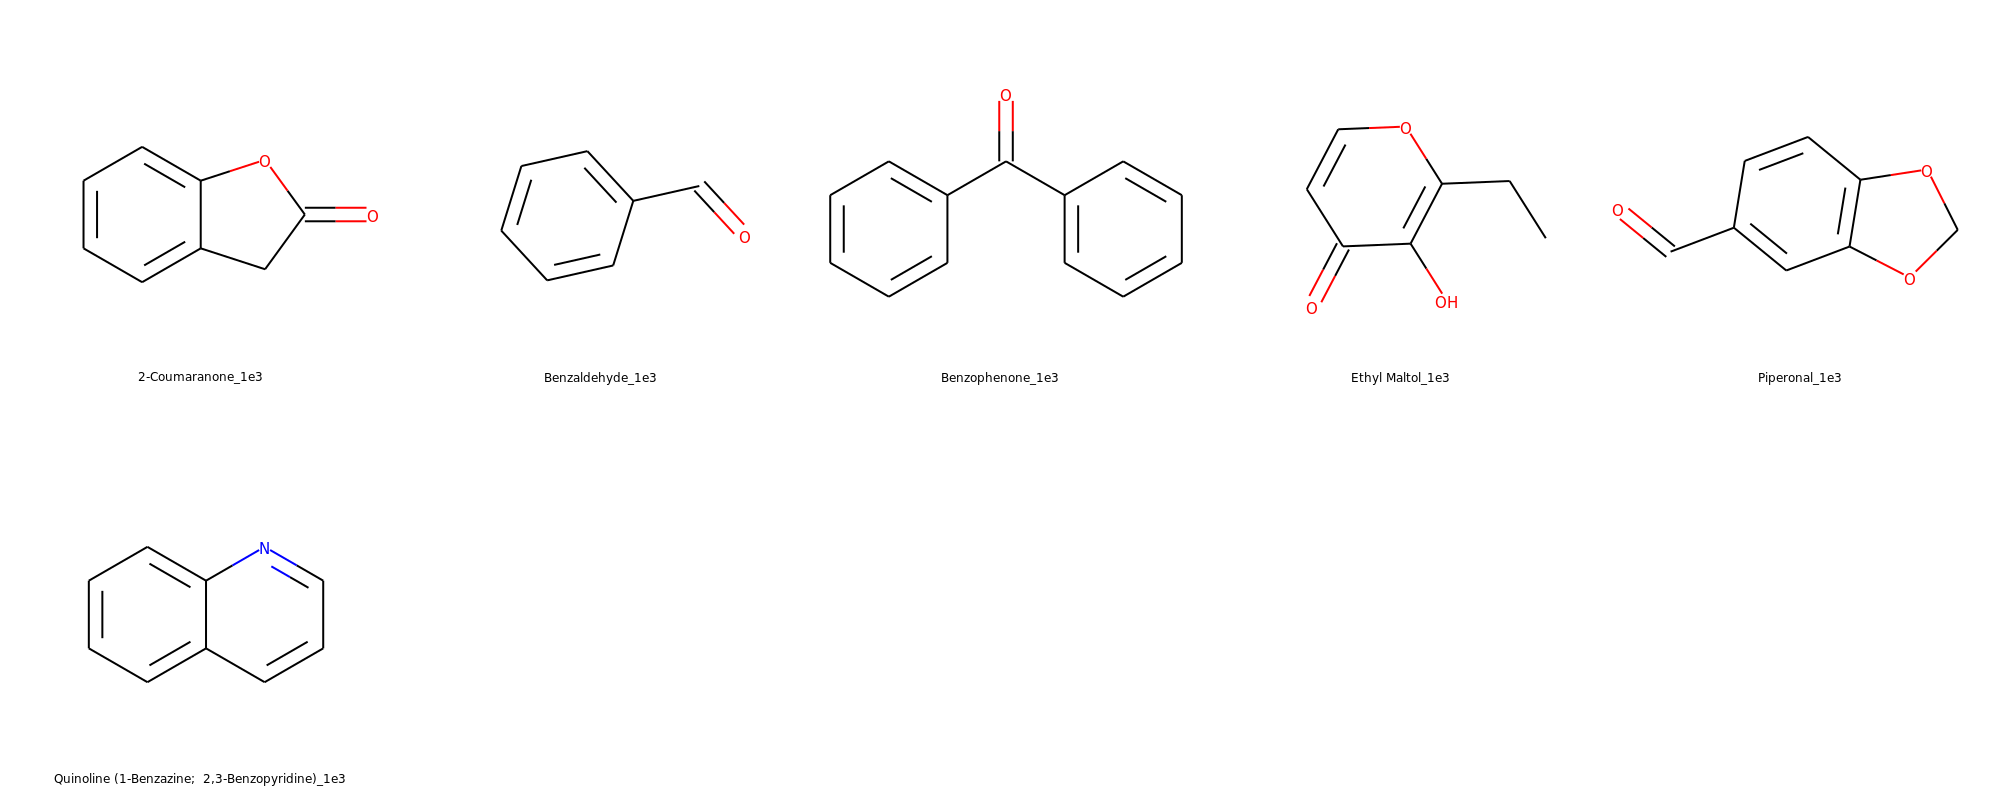

9_1


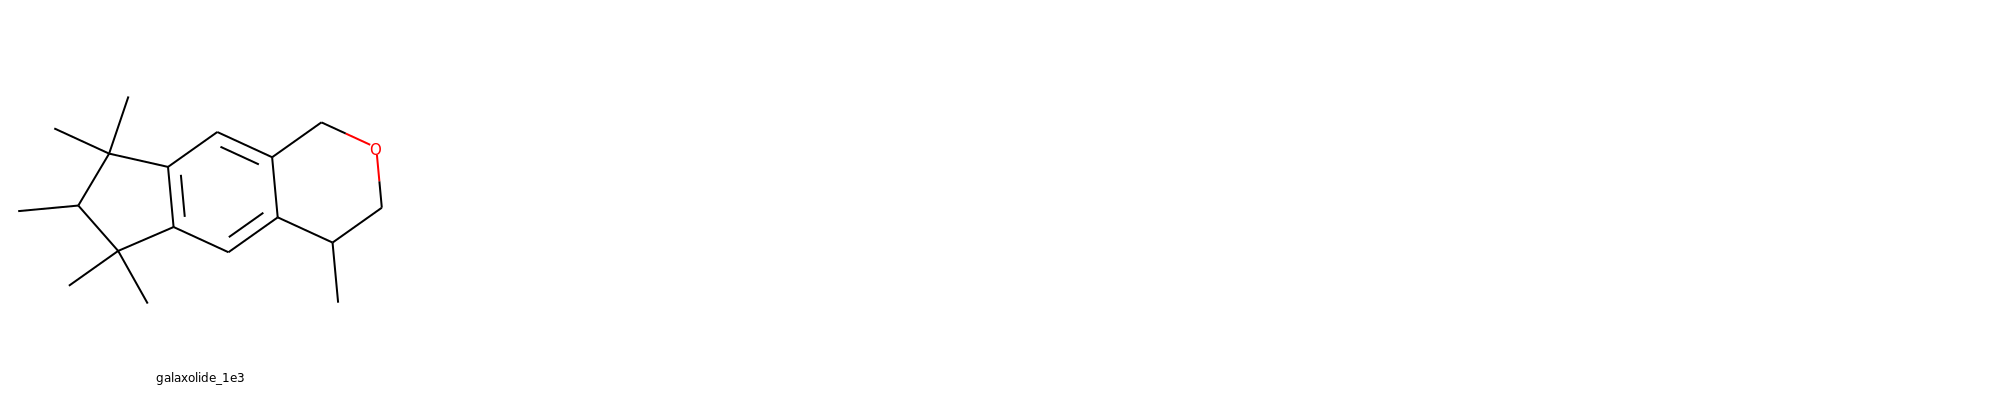

In [4]:
DrawingOptions.atomLabelFontSize=200
images = list()
for receptor, store in or_chems.items():
    print(receptor)
    display(Draw.MolsToGridImage([Chem.inchi.MolFromInchi(x[1]) for x in store], 
                                 legends=[x[0] + '_' + str(x[2]) for x in store], 
                                 molsPerRow=5, 
                                 maxMols=200,  
                                 subImgSize=(400, 400)))

Let's create a nice table of all the chemicals and their identifiers for the supplement.

In [5]:
PandasTools.RenderImagesInAllDataFrames()
data = [list(itertools.chain([key], val[:2], val[4:7])) for key, val in name_map.items()]
tmp = [list(itertools.chain(cols, [img])) for cols, img in zip(data, chem_images)]
df = pd.DataFrame(tmp, 
             columns=['Name', 'PubChem ID', 'InChI Key', 'InChI', 'Isomeric SMILES', 'Canonical SMILES', 'Structure'])

Now that we have our molecules in a Pandas DataFrame, we can calculate a number of different chemical properties. Below is our current list:

In [6]:
properties = set(['MaxAbsPartialCharge',
    'MinPartialCharge',
    'MinAbsPartialCharge',
    'HeavyAtomMolWt',
    'MaxAbsEStateIndex',
    'NumRadicalElectrons',
    'NumValenceElectrons',
    'MinAbsEStateIndex',
    'MaxEStateIndex',
    'MaxPartialCharge',
    'MinEStateIndex',
    'ExactMolWt',
    'MolWt',
    'FractionCSP3',
    'HeavyAtomCount',
    'NHOHCount',
    'NOCount',
    'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles',
    'NumAliphaticRings',
    'NumAromaticCarbocycles',
    'NumAromaticHeterocycles',
    'NumAromaticRings',
    'NumHAcceptors',
    'NumHDonors',
    'NumHeteroatoms',
    'NumRotatableBonds',
    'NumSaturatedCarbocycles',
    'NumSaturatedHeterocycles',
    'NumSaturatedRings',
    'RingCount',
    'MolLogP',
    'MolMR'])

{'MolLogP', 'MolMR'}

In [7]:
df_props = df.copy()
for prop in properties:
    df_props[prop] =  df_props.apply(lambda x: eval("Descriptors." + prop + "(x['Structure'])"), axis = 1)

In [8]:
df_props[df_props.columns.difference(['Structure'])].to_csv(
    'chem-props.tsv', 
    sep='\t', 
    header=True,
    index=False)